In [37]:
import numpy as np 
import matplotlib.pyplot as plt


def rice_bowl_function(x): 
    return 2*(x[0]**2) + 4*x[0]*x[1]
    # return None 
    

In [29]:
# 밑바닥부터 시작하는 딥러닝 p.127 
def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
    h = 1e-4 # 0.0001 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
    
    # The partial differential of function f with respect to x_idx 
    for idx in range(x.size): 
        tmp_val = x[idx] 

        # f(x+h)
        x[idx] = tmp_val + h
        f_x_plus_h = f(x)
        
        # f(x) 
        x[idx] = tmp_val
        fx = f(x)
        
        
        grad[idx] = (f_x_plus_h - fx) / h 
        
        #x[idx] = tmp_val 
    
    return grad

In [30]:
def numerical_gradient(f, X): 
    def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
        
        h = 1e-4 # 0.0001 
        
        grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
        
        # The partial differential of funct`ion f with respect to x_idx 
      
        for idx in range(x.size): 
            tmp_val = x[idx] 

            # f(x+h)
            x[idx] = tmp_val + h 
            f_x_plus_h = f(x)
            
            # f(x) 
            x[idx] = tmp_val 
            fx = f(x) 
            
            grad[idx] = (f_x_plus_h - fx) / h 
            
            #x[idx] = tmp_val 
        
        return grad
    if X.ndim == 1:
        return numerical_gradient_of_scalar_function_wrt_vector_x(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_of_scalar_function_wrt_vector_x(f, x)
        
        return grad 

In [31]:
def numerical_diff(f, x): 
    h = 1e-5 # 0.00001 
    #return ( f(x + h) - f(x - h) ) / (2 * h)   # Symmetric derivative 
    return (f(x + h) - f(x)) / h                # Derivative 

In [32]:
# 밑바닥부터 시작하는 딥러닝 p.128
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([1.0, 1.0]))

array([8.0002, 4.    ])

In [33]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.21 ~ 31  
# [Day2]_Gradient Descent and Searching Space Topology.pdf p.35 
# 밑바닥부터 시작하는 딥러닝 p.131
def gradient_descent(f, x_0, eta=0.001, max_iter=10000): 
    x_k = x_0 
    
    for k in range(max_iter): 
        g_k = numerical_gradient(f, x_k)
        partial_x_k = -g_k
        x_k_plus_1 = x_k + eta * partial_x_k
        

        x_k = x_k_plus_1
        
        
    return x_k # 최적화 값.

In [34]:
x_0 = np.array([1.0, 1.0]) # 초기값, 시작점

In [35]:
gradient_descent(rice_bowl_function, x_0=x_0, eta=0.001, max_iter=10000) # eta는 아주 작은 값은 상수로 고정한다.

array([-9.02784823e+09,  1.45653242e+10])

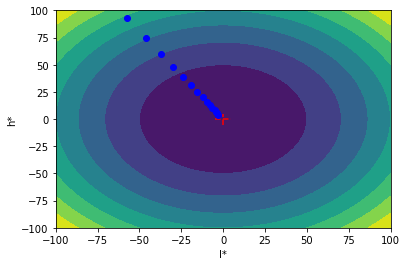

In [39]:
eta = 0.1
max_iter = 100000

def _gradient_descent(f, x_0, eta=0.0001, max_iter=10000):
    x = x_0
    x_history = []

    for k in range(max_iter):
        x_history.append( x.copy() )

        g = numerical_gradient(f, x) 
        x = x - eta * g 

    return x, np.array(x_history)

def rice_bowl_function(x): 
    return 2*(x[0]**2) + 4*x[0]*x[1] #  Objective function

x_0 = np.array([-3.0, 4.0])    

x, x_history = _gradient_descent(rice_bowl_function, x_0, eta=eta, max_iter=max_iter)

plt.plot( [-5, 5], [0,0], '--r')
plt.plot( [0,0], [-5, 5], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-100, 100, 70) 
feature_y = np.linspace(-100, 100, 70) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
plt.contourf(X, Y, Z) 

plt.xlim(-100, 100)
plt.ylim(-100, 100)
# plt.xlim(-3.5, 3.5)
# plt.ylim(-4.5, 4.5)
plt.xlabel("l*")
plt.ylabel("h*")
plt.show()